# Univariate Analysis

## Looking ahead: April Week 4, May Week 1

- In the end of April and early May, we'll dive deep into **statistics** finally.  
  - How do we calculate descriptive statistics in Python?
  - What principles should we keep in mind?

Univariate analysis is a type of statistical analysis that involves examining the distribution and characteristics of a single variable. The prefix “uni-” means “one,” so univariate analysis focuses on one variable at a time, without considering relationships between variables.

Univariate analysis is the foundation of data analysis and is essential for understanding the basic structure of your data before moving on to more complex techniques like bivariate or multivariate analysis.

# Measurement scales

Measurement scales determine what mathematical and statistical operations can be performed on data. There are four basic types of scales:

1. **Nominal** scale
- Data is used only for naming or categorizing.
- The order between values cannot be determined.
- Possible operations: count, mode, frequency analysis.

Examples:
- Pokémon type (type_1): “fire”, ‘water’, ‘grass’, etc.
- Species, gender, colors, brands etc.

In [31]:
import pandas as pd
df_pokemon = pd.read_csv("pokemon.csv")
df_pokemon["Type 1"].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

2. **Ordinal** scale
- Data can be ordered, but the distances between them are not known.
- Possible operations: median, quantiles, rank tests (e.g. Spearman).

Examples:
- Strength level: "low", "medium", "high".
- Quality ratings: "weak", "good", "very good".

In [32]:
import seaborn as sns

titanic = sns.load_dataset("titanic")

print(titanic["class"].unique())

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']


3. **Interval** scale
- The data is numerical, with equal intervals, but lacks an absolute zero.
- Differences, mean, and standard deviation can be calculated.
- Ratios (e.g., "twice as much") do not make sense.

Examples:
- Temperature in °C (but not in Kelvin!). Why? There is no absolute zero—zero does not mean the absence of the property; it is just a conventional reference point. 0°C does not mean no temperature; 20°C is not 2 × 10°C.
- Year in a calendar (e.g., 1990). Why? Year 0 does not mark the beginning of time; 2000 is not 2 × 1000.
- Time in the hourly system (e.g., 13:00). Why? 0:00 does not mean no time, but rather an established reference point.

4. **Ratio** scale
- Numerical data with an absolute zero.
- All mathematical operations, including division, can be performed.
  
> **Not all numerical data is on a ratio scale!** For example, temperature in degrees Celsius is not on a ratio scale because 0°C does not mean the absence of temperature. However, temperature in Kelvin (K) is, as 0 K represents the absolute absence of thermal energy.

Examples:
- Height, weight, number of Pokémon attack points (attack), HP, speed.

In [33]:
df_pokemon[["HP", "Attack", "Speed"]].describe()

,HP,Attack,Speed
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,68.277500
std,25.534669,32.457366,29.060474
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,45.000000
50%,65.000000,75.000000,65.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,180.000000


### Table: Measurement scales in statistics

| Scale          | Example                           | Is it possible to order? | Equal spacing? | Absolute zero? | Sample statistical calculations       |
|----------------|-------------------------------------|--------------------------|----------------|------------------|------------------------------------------|
| **Nominal**  | Pokémon type (`fire`, `water` etc.)| ❌                       | ❌             | ❌               | Mode, counts, frequency analysis      |
| **Ordinal** | Ticket class (`First`, `Second`, `Third`) | ✅                       | ❌             | ❌               | Median, quantiles         |
| **Interval** | Temperature in °C                  | ✅                       | ✅             | ❌               | Mean, standard deviation         |
| **Ratio**  | HP, attack, height                   | ✅                       | ✅             | ✅               | All mathematical operations/statistical |

**Conclusion**: The type of scale affects the choice of statistical methods - for example, the Pearson correlation test requires quotient or interval data, while the Chi² test requires nominal data.

![title](img/scales.jpg)

### Quiz: measurement scales in statistics.

Answer the following questions by choosing **one correct answer**. You will find the solutions at the end.

---

#### 1. Which scale **enables ordering of data**, but **does not have equal spacing**?
- A) Nominal  
- B) Ordinal  
- C) Interval  
- D) Ratio  

---

#### 2. An example of a variable on the **nominal scale** is:
- A) Temperature in °C  
- B) Height  
- C) Type of Pokémon (`fire`, `grass`, `water`)  
- D) Satisfaction level (`low`, `medium`, `high`).  

---

#### 3. Which scale **does not have absolute zero**, but has **equal spacing**?
- A) Ratio  
- B) Ordinal  
- C) Interval  
- D) Nominal  

---

#### 4. What operations are **allowed** on variables **on an ordinal scale**?
- A) Mean and standard deviation  
- B) Mode and Pearson correlation  
- C) Median and rank tests  
- D) Quotients and logarithms  

---

#### 5. The variable `“class”` in the Titanic set (`First`, `Second`, `Third`) is an example:
- A) Nominal scale  
- B) Ratio scale  
- C) Interval scale  
- D) Ordinal scale  

---

# Descriptive statistics

**Descriptive statistics** deals with the description of the distribution of data in a sample. Descriptive statistics give us basic summary measures about a set of data. Summary measures include measures of central tendency (mean, median and mode) and measures of variability (variance, standard deviation, minimum/maximum values, IQR (interquartile range), skewness and kurtosis).

## This week

Now we're going to look at **describing** our data - as well as the **basics of statistics**.

There are many ways to *describe* a distribution. 

Here we will discuss:
- Measures of **central tendency**: what is the typical value in this distribution?
- Measures of **variability**: how much do the values differ from each other?  
- Measures of **skewness**: how strong is the asymmetry of the distribution?
- Measures of **curvature**: what is the intensity of extreme values?

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

In [35]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Central tendency

The **central tendency** refers to the “typical value” in a distribution.

The **central tendency** refers to the central value that describes the distribution of a variable. It can also be referred to as the center or location of the distribution. The most common measures of central tendency are **average**, **median** and **mode**. The most common measure of central tendency is the **mean**. In the case of skewed distributions or when there is concern about outliers, the **median** may be preferred. The median is thus a more reliable measure than the mean.

There are many ways to *measure* what is “typical” - average:

- Arithmetic mean
- Median (middle value)
- Mode (dominant)

### Why is this useful?

- A dataset may contain *many* observations.  
   - For example, $N$ = $5000$ of survey responses regarding `height'.  
- One way to “describe” this distribution is to **visualize** it.  
- But it is also helpful to reduce this distribution to a *single number*.

This is necessarily a **simplification** of our dataset!

### *Arithmetic average*

> **Arithmetic average** is defined as the `sum` of all values in a distribution, divided by the number of observations in that distribution.

In [36]:
numbers = [1, 2, 3, 4]
### calculating manually...
sum(numbers)/len(numbers)

2.5

- The most common measure of central tendency is the average.
- The mean is also known as the simple average.
- It is denoted by the Greek letter $µ$ for a population and $\bar{x}$ for a sample.
- We can find the average of the number of elements by adding all the elements in the data set and then dividing by the number of elements in the data set.
- This is the most popular measure of central tendency, but it has a drawback.
- The average is affected by the presence of outliers.
- Thus, the average alone is not sufficient for making business decisions.

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$



#### `numpy.mean`

The `numpy` package has a function that calculates an `average` on a `list` or `numpy.ndarray`.

In [37]:
np.mean(numbers)

np.float64(2.5)

#### `scipy.stats.tmean`

The [scipy.stats](https://docs.scipy.org/doc/scipy/tutorial/stats.html) library has a variety of statistical functions.

In [38]:
stats.tmean(numbers)

np.float64(2.5)

#### Calculating the `average` of a `pandas` column.

If we work with `DataFrame`, we can calculate the `average` of specific columns.

In [39]:
import pandas as pd
df_gapminder = pd.read_csv("gapminder_full.csv")
df_gapminder.head(2)

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030


In [40]:
df_gapminder['life_exp'].mean()

np.float64(59.474439366197174)

#### Your turn

How to calculate the mean life expectancy for EUROPEan countries (2007).

77.6486
78.60849999999999


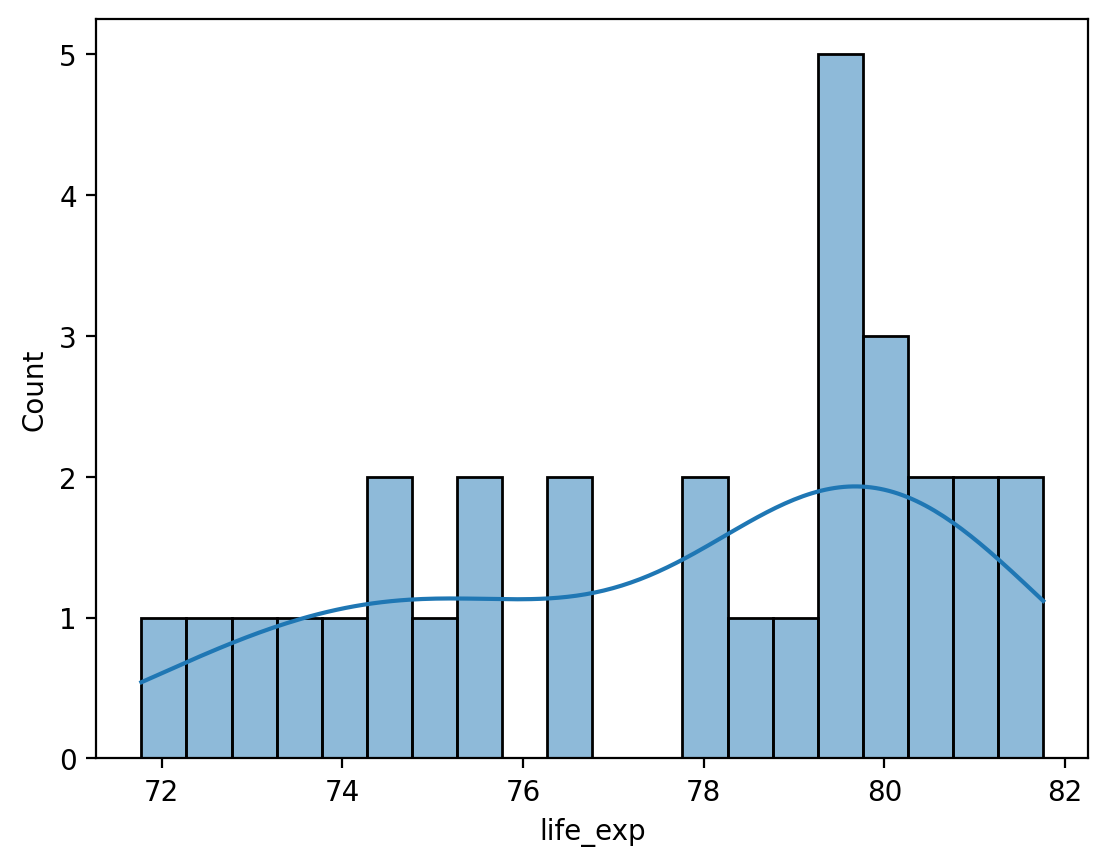

In [41]:
gapminder_2007 = df_gapminder[df_gapminder['year']==2007]
gapminder_2007_europe = gapminder_2007[gapminder_2007['continent']=='Europe']
mean_life_exp = gapminder_2007_europe['life_exp'].mean()
median_life_exp = gapminder_2007_europe['life_exp'].median()
print(mean_life_exp)
print(median_life_exp)
sns.histplot(data = gapminder_2007_europe, x = "life_exp", bins = 20, kde = True);

#### *Average* and skewness

> **Skewness** means that there are values *extending* one of the “tails” of the distribution.

Of the measures of **central tendency**, “average” is the most dependent on the direction of skewness.

- How would you describe the following **skewness**?  
- Do you think the “mean” would be higher or lower than the “median”?

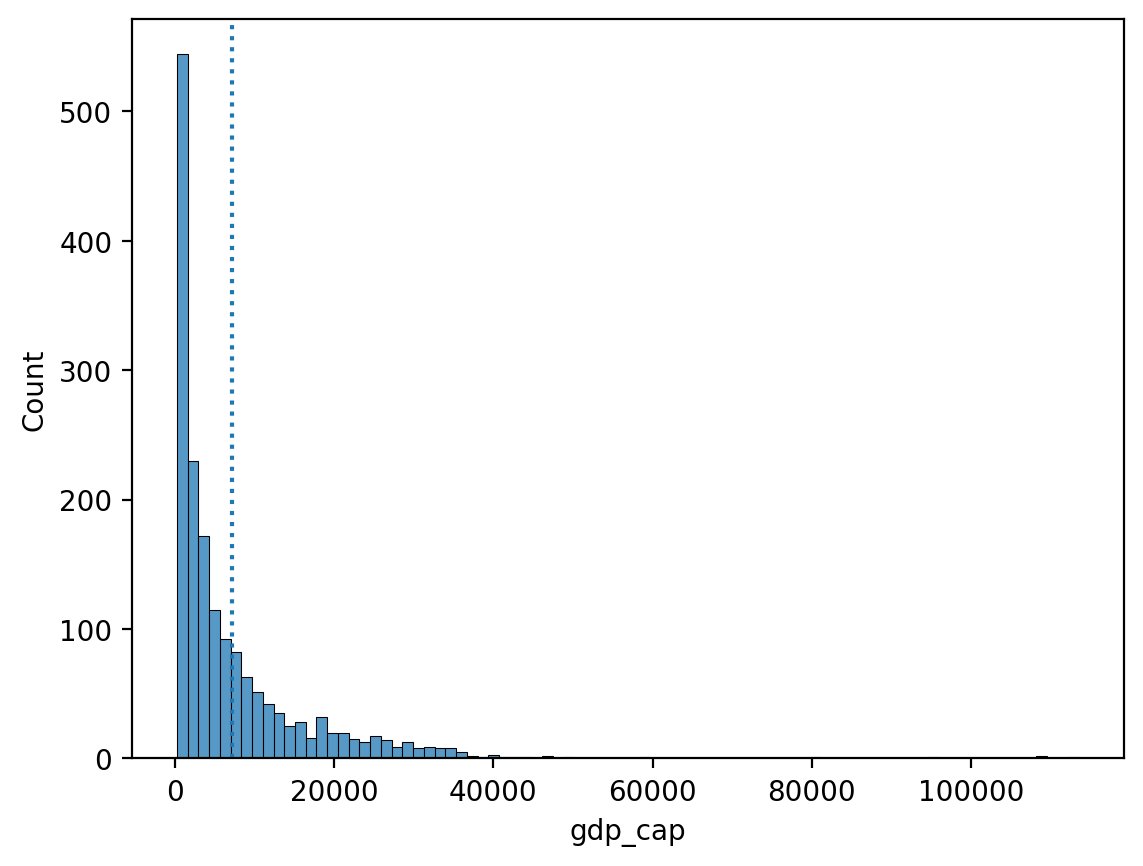

In [42]:
sns.histplot(data = df_gapminder, x = "gdp_cap")
plt.axvline(df_gapminder['gdp_cap'].mean(), linestyle = "dotted");

#### Your turn

Is it possible to calculate the average of the column “continent”? Why or why not?

In [43]:
# no, it's a nominal variable

#### Your turn

- Subtract each observation in `numbers` from the `average` of this `list`.  
- Then calculate the **sum** of these deviations from the `average`.

What is their sum?

In [44]:
numbers = np.array([1, 2, 3, 4])
mean = numbers.mean()
meanArray = np.array([mean]*len(numbers))
diff = meanArray-numbers
print(diff.sum())

0.0


#### Summary of the first part

- The mean is one of the most common measures of central tendency.  
- It can only be used for **continuous** interval/ratio data.  
- The **sum of deviations** from the mean is equal to `0`. 
- The “mean” is most affected by **skewness** and **outliers**.

### *Median*

> *Median* is calculated by sorting all values from smallest to largest and then finding the value in the middle.

- The median is the number that divides a data set into two equal halves.
- To calculate the median, we need to sort our data set of n numbers in ascending order.
- The median of this data set is the number in the position $(n+1)/2$ if $n$ is odd.
- If n is even, the median is the average of the $(n/2)$ third number and the $(n+2)/2$ third number.
- The median is robust to outliers.
- Thus, in the case of skewed distributions or when there is concern about outliers, the median may be preferred.

In [45]:
df_gapminder['gdp_cap'].median()

np.float64(3531.8469885)

#### Comparison of `median` and `average`.

The direction of inclination has less effect on the `median`.

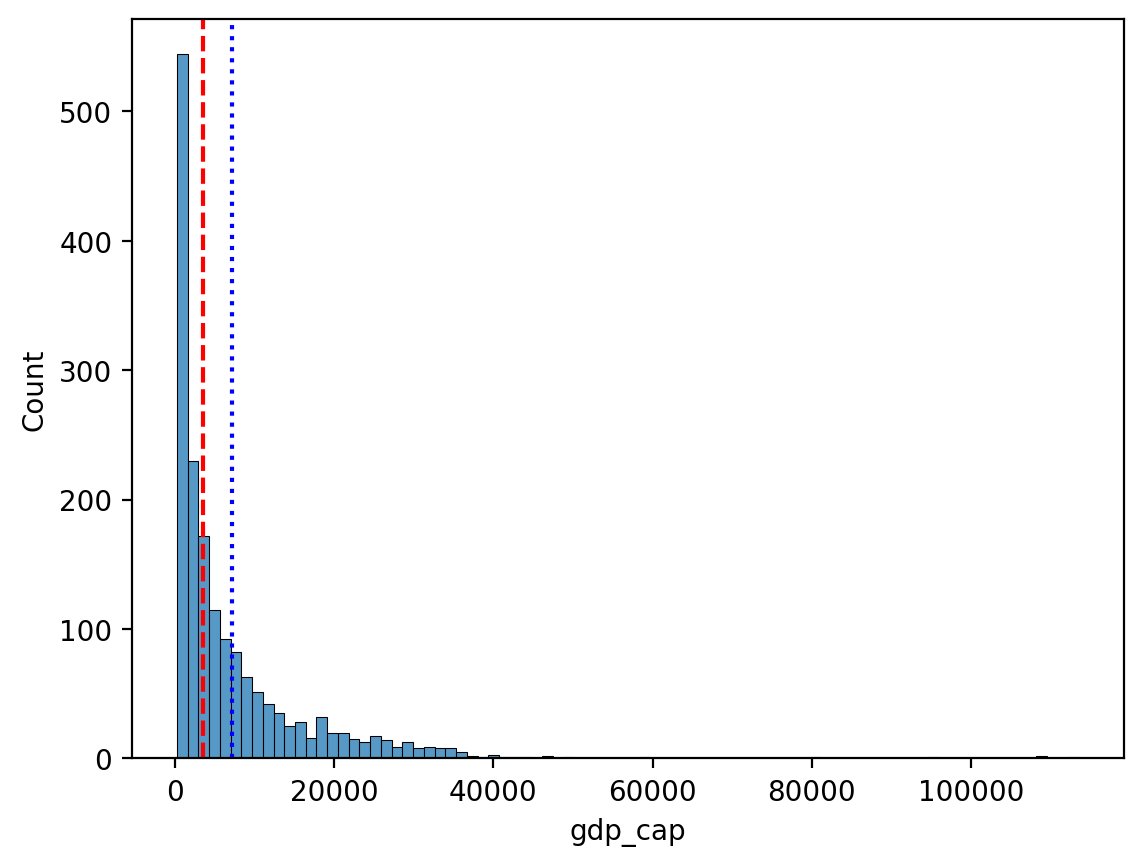

In [46]:
sns.histplot(data = df_gapminder, x = "gdp_cap")
plt.axvline(df_gapminder['gdp_cap'].mean(), linestyle = "dotted", color = "blue")
plt.axvline(df_gapminder['gdp_cap'].median(), linestyle = "dashed", color = "red");

#### Your turn

Is it possible to calculate the median of the column “continent”? Why or why not?

In [47]:
# no, it's a nominal variable

### *Mode*

> **Mode** is the most common value in a data set. 

Unlike `median` or `average`, `mode` can be used with **categorical** data.

In [49]:
df_pokemon = pd.read_csv("pokemon.csv")
df_pokemon['Type 1'].mode()

0    Water
Name: Type 1, dtype: object

#### `mode()` returns multiple values?

- If multiple values *bind* for the most frequent one, `mode()` will return them all.
- This is because technically, a distribution can have multiple values for the most frequent - modal!

In [50]:
df_gapminder['gdp_cap'].mode()

0          241.165876
1          277.551859
2          298.846212
3          299.850319
4          312.188423
            ...      
1699     80894.883260
1700     95458.111760
1701    108382.352900
1702    109347.867000
1703    113523.132900
Name: gdp_cap, Length: 1704, dtype: float64

### Measures of central tendency - summary

|Measure|Can be used for:|Limitations|
|-------|----------------|-----------|
|Mean|Continuous data|Influence on skewness and outliers|
|Median|Continuous data|Does not include the *value* of all data points in the calculation (ranks only)|
|Mode|Continuous and categorical data|Considers only *frequent*; ignores other values|

## Quantiles

**Quantiles** are descriptive - positional statistics that divide an ordered data set into equal parts. The most common quantiles are:

- **Median** (quantile of order 0.5),
- **Quartiles** (divide the data into 4 parts),
- **Deciles** (into 10 parts),
- **Percentiles** (into 100 parts).

### Definition

A quantile of order $q \in (0,1)$ is a value of $x_q$ such that:

$$
P(X \leq x_q) = q
$$

In other words: $q \cdot 100\%$ of the values in the data set are less than or equal to $x_q$.

### Formula (for an ordered data set)

For a data sample $x_1, x_2, \ldots, x_n$ ordered in ascending order, the quantile of order $q$ is determined as:

1. Calculate the positional index:

$$
i = q \cdot (n + 1)
$$

2. If $i$ is an integer, then the quantile is $x_i$.

3. If $i$ is not integer, we interpolate linearly between adjacent values:

$$
x_q = x_{\lfloor i \rfloor} + (i - \lfloor i \rfloor) \cdot (x_{\lceil i \rceil} - x_{\lfloor i \rfloor})
$$

**Note:** In practice, different methods are used to determine quantiles - libraries such as NumPy or Pandas have different modes (e.g. `method='linear'`, `method='midpoint'`).

### Example - we calculate step by step:

For data:
$
[3, 7, 8, 5, 12, 14, 21, 13, 18]
$

1. We arrange the data in ascending order:

$
[3, 5, 7, 8, 12, 13, 14, 18, 21]
$

2. Median (quantile of order 0.5):

The number of elements $n = 9$, the middle element is the 5th value:

$
\text{Median} = x_5 = 12
$

3. First quartile (Q1, quantile of order 0.25):

$
i = 0.25 \cdot (9 + 1) = 2.5
$

Interpolation between $x_2 = 5$ and $x_3 = 7$:

$
Q_1 = 5 + 0.5 \cdot (7 - 5) = 6
$

4. Third quartile (Q3, quantile of 0.75):

$
i = 0.75 \cdot 10 = 7.5
$

Interpolation between $x_7 = 14$ and $x_8 = 18$:

$
Q_3 = 14 + 0.5 \cdot (18 - 14) = 16
$

### Deciles

**Deciles** divide data into 10 equal parts. For example:

- **D1** is the 10th percentile (quantile of 0.1),
- **D5** is the median (0.5),
- **D9** is the 90th percentile (0.9).

The formula is the same as for overall quantiles, just use the corresponding $q$. E.g. for D3:

$
q = \frac{3}{10} = 0.3
$

### Percentiles

**Percentiles** divide data into 100 equal parts. E.g.:

- **P25** = Q1,
- **P50** = median,
- **P75** = Q3,
- **P90** is the value below which 90% of the data is.

With percentiles, we can better understand the distribution of data - for example, in standardized tests, a score is often given as a percentile (e.g., “85th percentile” means that someone scored better than 85% of the population).

---

### Quantiles - summary

| Name     | Symbol | Quantile \( q \) | Meaning                          |
|-----------|--------|------------------|-------------------------------------|
| Q1        | Q1     | 0.25             | 25% of data ≤ Q1                     |
| Median   | Q2     | 0.5              | 50% of data ≤ Median                |
| Q3        | Q3     | 0.75             | 75% of data ≤ Q3                     |
| Decile 1   | D1     | 0.1              | 10% of data ≤ D1                     |
| Decile 9   | D9     | 0.9              | 90% of data ≤ D9                     |
| Percentile 95 | P95 | 0.95             | 95% of data ≤ P95                    |

---

### Example - calculations of quantiles

In [51]:
# Sample data
mydata = [3, 7, 8, 5, 12, 14, 21, 13, 18]
mydata_sorted = sorted(mydata)
skewness = stats.skew(mydata)
kurtosis = stats.kurtosis(mydata)
print(skewness)
print(kurtosis)
print("Sorted data:", mydata_sorted)

0.22652674400641168
-1.060915436600742
Sorted data: [3, 5, 7, 8, 12, 13, 14, 18, 21]


In [52]:
# Conversion to Pandas Series
s = pd.Series(mydata)

# Quantiles
q1 = s.quantile(0.25) # lower quartile Q1
median = s.quantile(0.5) # median or middle quartile Q2 = Me
q3 = s.quantile(0.75) # upper quartile Q3

# Deciles
d1 = s.quantile(0.1) # bottom 10% of data...
d9 = s.quantile(0.9) # top 10% of data...

# Percentiles
p95 = s.quantile(0.95)  # top 5% of data...

print("Quantiles:")
print(f"Q1 (25%): {q1}")
print(f"Median (50%): {median}")
print(f"Q3 (75%): {q3}")
print("\nDeciles:")
print(f"D1 (10%): {d1}")
print(f"D9 (90%): {d9}")
print("\nPercentiles:")
print(f"P95 (95%): {p95}")

Quantiles:
Q1 (25%): 7.0
Median (50%): 12.0
Q3 (75%): 14.0

Deciles:
D1 (10%): 4.6
D9 (90%): 18.6

Percentiles:
P95 (95%): 19.799999999999997


0.22652674400641168


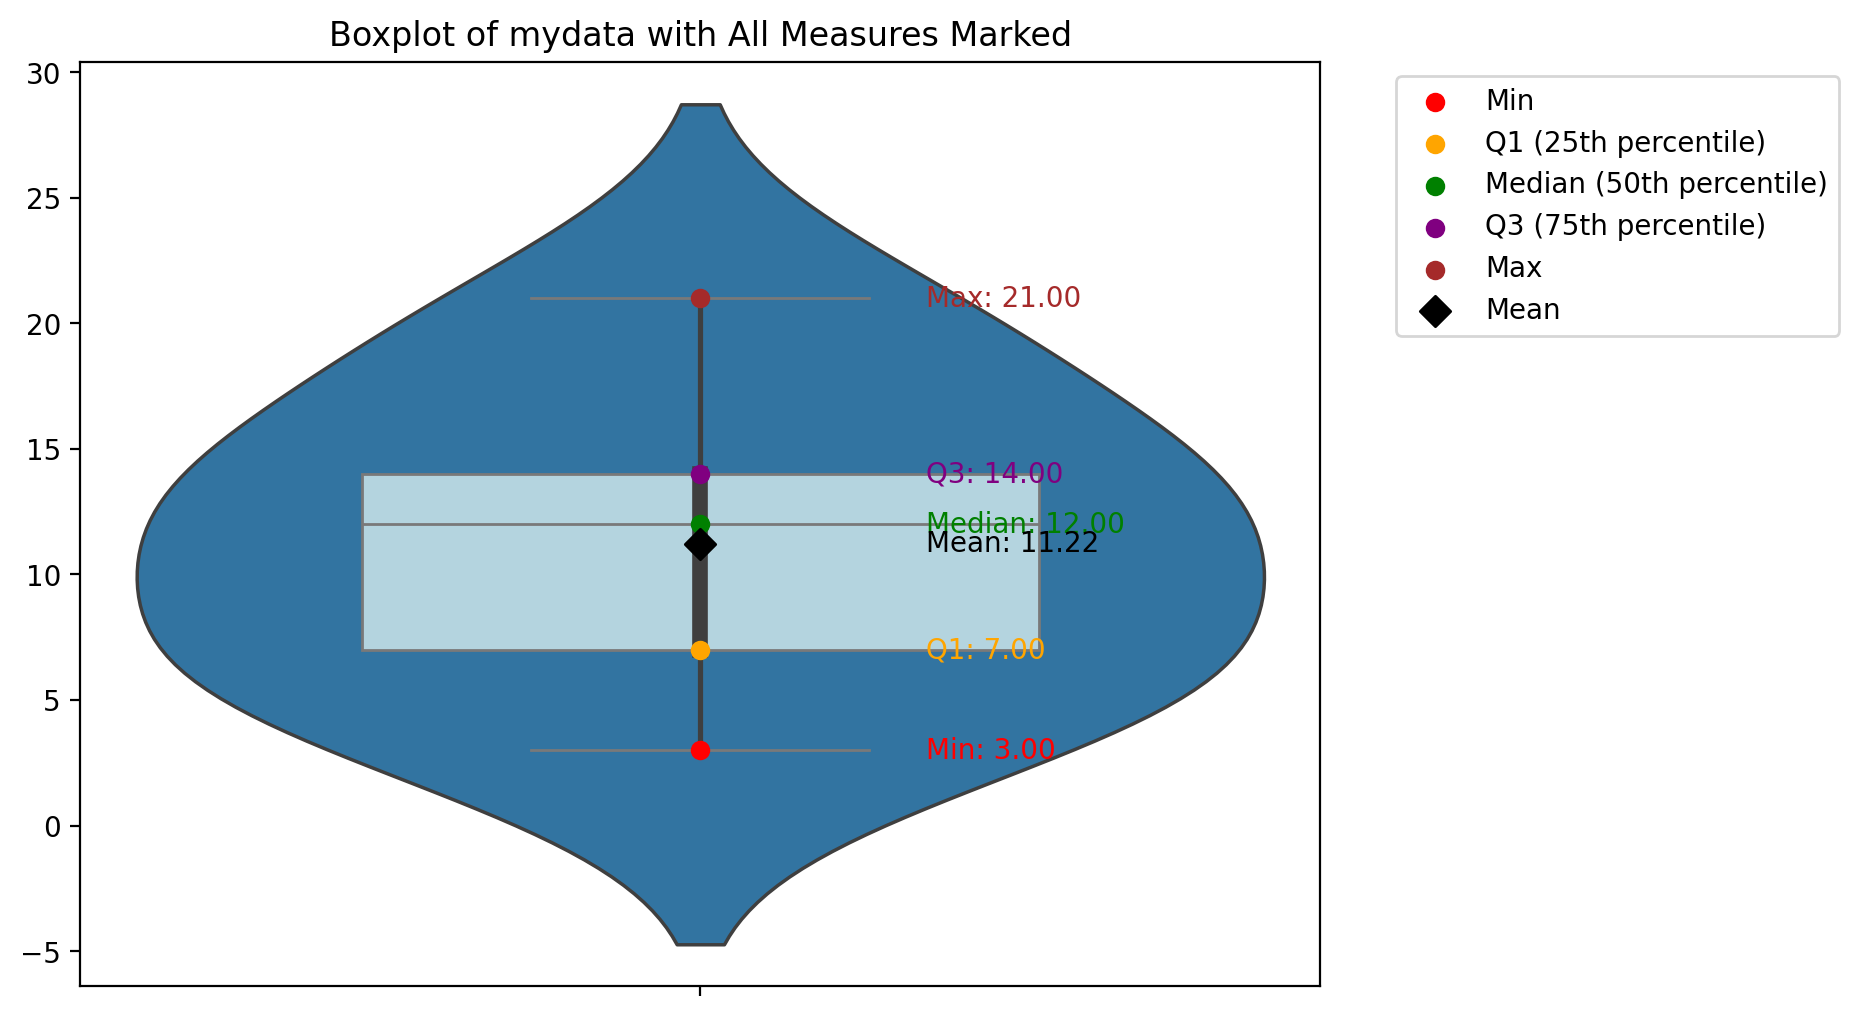

In [53]:
# Create boxplot
mydata = [3, 7, 8, 5, 12, 14, 21, 13, 18] # somehow the notebook couldn't find mydata
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data = mydata, ax=ax, color='lightblue', width=0.3)
sns.violinplot(data = mydata, width = 0.5, )
print(stats.skew(mydata))
# Calculate statistics
minimum = np.min(mydata)
q1 = np.percentile(mydata, 25)
median = np.median(mydata)
q3 = np.percentile(mydata, 75)
maximum = np.max(mydata)
mean = np.mean(mydata)

ax.scatter(0, minimum, color='red', label='Min', zorder=5)
ax.scatter(0, q1, color='orange', label='Q1 (25th percentile)', zorder=5)
ax.scatter(0, median, color='green', label='Median (50th percentile)', zorder=5)
ax.scatter(0, q3, color='purple', label='Q3 (75th percentile)', zorder=5)
ax.scatter(0, maximum, color='brown', label='Max', zorder=5)
ax.scatter(0, mean, color='black', marker='D', s=60, label='Mean', zorder=5)

for value, name, color in zip(
    [minimum, q1, median, mean, q3, maximum],
    ['Min', 'Q1', 'Median', 'Mean', 'Q3', 'Max'],
    ['red', 'orange', 'green', 'black', 'purple', 'brown']
):
    ax.text(0.1, value, f'{name}: {value:.2f}', verticalalignment='center', color=color)


ax.set_title('Boxplot of mydata with All Measures Marked')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Your turn!

Try to change the boxplot into the violin plot (or add it). 

Looking at the aforementioned quantile results and the box plot, try to interpret these measures. 

## Variability

> **Variability** (or **dispersion**) refers to the degree to which values in a distribution are *dispersed*, i.e., differ from each other.

The **dispersion** is an indicator of how far from the center we can find data values. The most common measures of dispersion are **variance**, **standard deviation** and **interquartile range (IQR)**. The **variance** is a standard measure of dispersion. The **standard deviation** is the square root of the variance. The **variance** and **standard deviation** are two useful measures of scatter.

### The `mean` hides the variance!

Both distributions have *the same* mean, but *different* **standard deviations**.

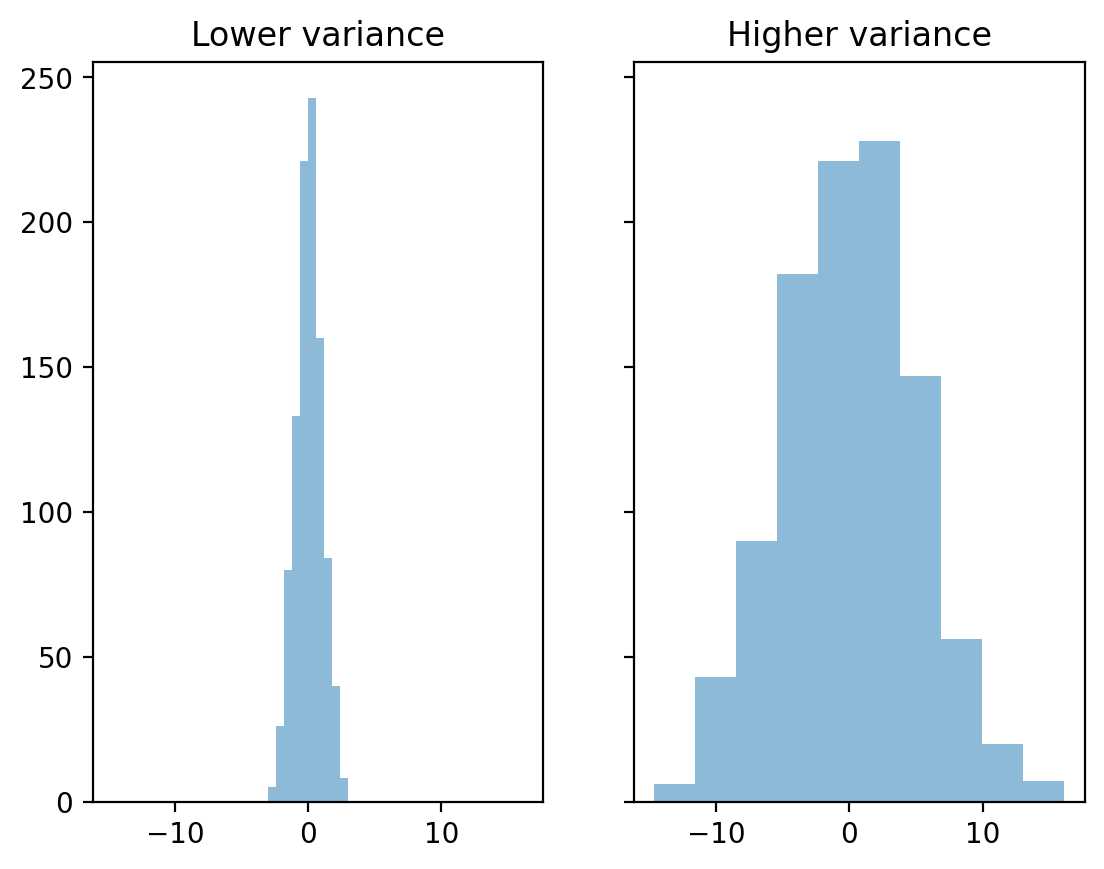

In [54]:
### Let's create some distributions
d1 = np.random.normal(loc = 0, scale = 1, size = 1000)
d2 = np.random.normal(loc = 0, scale = 5, size = 1000)
### Plots
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True);
p1 = axes[0].hist(d1, alpha = .5)
p2 = axes[1].hist(d2, alpha = .5)
axes[0].set_title("Lower variance");
axes[1].set_title("Higher variance");

### Volatility detection

There are at least *three* main approaches to quantifying variability:

- **Range**: the difference between the “maximum” and “minimum” value. 
- **Interquartile range (IQR)**: The range of the middle 50% of the data.  
- **Variance** and **Standard Deviation**: the typical value by which results deviate from the mean.

### Range

> **Range** Is the difference between the `maximum` and `minimum` values.

Intuitive, but only considers two values in the entire distribution.

In [55]:
d1.max() - d1.min()

np.float64(5.991281179314035)

In [56]:
d2.max() - d2.min()

np.float64(30.766199642745818)

### IQR

> The **interquartile range (IQR)** is the difference between a value in the 75% percentile and a value in the 25% percentile.

It focuses on the **center 50%**, but still only considers two values.

- IQR is calculated using the limits of the data between the 1st and 3rd quartiles. 
- The interquartile range (IQR) can be calculated as follows: $IQR = Q3 - Q1$
- In the same way that the median is more robust than the mean, the IQR is a more robust measure of scatter than the variance and standard deviation and should therefore be preferred for small or asymmetric distributions. 
- It is a robust measure of scatter.

In [57]:
## Let's calculate quantiles - quartiles Q1 and Q3
q3, q1 = np.percentile(d1, [75 ,25])
q3 - q1

np.float64(1.320177604634091)

In [58]:
## Let's calculate quantiles - quartiles Q1 and Q3
q3, q1 = np.percentile(d2, [75 ,25])
q3 - q1

np.float64(6.7798324556389495)

### Variance and standard deviation.

The **Variance** measures the dispersion of a set of data points around their mean value. It is the average of the squares of the individual deviations. The variance gives the results in original units squared.

$$
s^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

**Standard deviation (SD)** measures the *typical value* by which the results in the distribution deviate from the mean.

$$
s = \sqrt{s^2} = \sqrt{\frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2}
$$

where:
	- $n$ - the number of elements in the sample
	- $bar{x}$ - the arithmetic mean of the sample

What to keep in mind:

- SD is the *square root* of [variance](https://en.wikipedia.org/wiki/Variance).  
- There are actually *two* measures of SD:
 - SD of a population: when you measure the entire population of interest (very rare).  
   - SD of a sample: when you measure a *sample* (typical case); we'll focus on that.

#### SD, explained

- First, calculate the total *square deviation*.
   - What is the total square deviation from the “mean”? 
- Then divide by `n - 1`: normalize to the number of observations.
   - What is the *average* squared deviation from the `average'?
- Finally, take the *square root*:
   - What is the *average* deviation from the “mean”?

The **standard deviation** represents the *typical* or “average” deviation from the “mean”.

#### SD calculation in `pandas`

In [59]:
df_pokemon['Attack'].std()

np.float64(32.45736586949845)

In [60]:
df_pokemon['HP'].std()

np.float64(25.53466903233207)

#### Note on `numpy.std`!!!

- By default, `numpy.std` calculates the **population standard deviation**!  
- You need to modify the `ddof` parameter to calculate the **sample standard deviation**.

This is a very common error.

In [61]:
### SD in population
d1.std()

np.float64(1.0016302994618593)

In [62]:
### SD for sample
d1.std(ddof = 1)

np.float64(1.002131490536236)

### Coefficient of variation (CV).

- The coefficient of variation (CV) is equal to the standard deviation divided by the mean.
- It is also known as “relative standard deviation.”

$$
CV = \frac{s}{\bar{x}} \cdot 100%
$$

In [63]:
X = [2, 4, 4, 4, 5, 5, 7, 9]
mean = np.mean(X)

# Variance and standard deviation from scipy (for the sample!):
var_sample = stats.tvar(X)      # sample variance
std_sample = stats.tstd(X)      # sample sd

# CV (for sample):
cv_sample = (std_sample / mean) * 100

print(f"Mean: {mean}")
print(f"Sample variance (scipy): {var_sample}")
print(f"Sample sd (scipy): {std_sample}")
print(f"CV (scipy): {cv_sample:.2f}%")

Mean: 5.0
Sample variance (scipy): 4.571428571428571
Sample sd (scipy): 2.138089935299395
CV (scipy): 42.76%


## Measures of the shape of the distribution

Now we will look at measures of the shape of the distribution. There are two statistical measures that can tell us about the shape of a distribution. These are **skewness** and **curvature**. These measures can be used to tell us about the shape of the distribution of a data set.

## Skewness
- **Skewness** is a measure of the symmetry of a distribution, or more precisely, the lack of symmetry. 
- It is used to determine the lack of symmetry with respect to the mean of a data set. 
- It is a characteristic of deviation from the mean. 
- It is used to indicate the shape of a data distribution.

Skewness is a measure of the asymmetry of the distribution of data relative to the mean. It tells us whether the data are more ‘stretched’ to one side.

Interpretation:

- Skewness > 0 - right-tailed (positive): long tail on the right (larger values are more dispersed)
- Skewness < 0 - left (negative): long tail on the left (smaller values are more dispersed)
- Skewness ≈ 0 - symmetric distribution (e.g. normal distribution)

Formula (for the sample):

$$
A = \frac{n}{(n-1)(n-2)} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3
$$

where:
- $n$ - number of observations
- $\bar{x}$ - sample mean
- $s$ - standard deviation of the sample

![title](img/skew.png)


#### Negative skewness

- In this case, the data are skewed or shifted to the left. 
- By skewed to the left, we mean that the left tail is long relative to the right tail. 
- The data values may extend further to the left, but are concentrated on the right. 
- So we are dealing with a long tail, and the distortion is caused by very small values that pull the mean down and it is smaller than the median. 
- In this case we have **Mean < Median < Mode**.
      

#### Zero skewness

- This means that the dataset is symmetric. 
- A dataset is symmetric if it looks the same to the left and right of the midpoint. 
- A dataset is bell-shaped or symmetric. 
- A perfectly symmetrical dataset will have a skewness of zero. 
- So a normal distribution that is perfectly symmetric has a skewness of 0. 
- In this case we have **Mean = Median = Mode**.
      

#### Positive skewness

- The dataset is skewed or shifted to the right. 
- By skewed to the right we mean that the right tail is long relative to the left tail. 
- The data values are concentrated on the right side. 
- There is a long tail on the right side, which is caused by very large values that pull the mean upwards and it is larger than the median. 
- So we have **Mean > Median > Mode**.

In [64]:
from scipy.stats import skew
X = [2, 4, 4, 4, 5, 5, 7, 9]
skewness = skew(X)
print(f"Skewness of X: {skewness:.4f}")

Skewness of X: 0.6562


### Your turn

Try to interpret the above-mentioned result and calculate example slant ratios for several groups of Pokémon.

In [65]:
# the skewness is positive, meaning the distribution is right-skewed, meaning most values are on the left, which checks out
type_skewness = {}
for pokemon_type in df_pokemon['Type 1'].unique():
    type_data = df_pokemon[df_pokemon['Type 1'] == pokemon_type]
    
    # Calculate skewness for Attack stat
    sk = stats.skew(type_data['Attack'].dropna())
    type_skewness[pokemon_type] = sk

# Display results sorted by skewness
sorted_skewness = sorted(type_skewness.items(), key=lambda x: x[1])
for pokemon_type, sk_value in sorted_skewness:
    print(f"{pokemon_type}: {sk_value:.4f}")

Flying: -0.4328
Fighting: -0.4031
Poison: -0.0050
Steel: 0.0534
Grass: 0.1594
Dragon: 0.1892
Rock: 0.2472
Fire: 0.3403
Normal: 0.3629
Water: 0.4393
Dark: 0.5382
Ground: 0.5712
Ice: 0.5934
Electric: 0.6001
Bug: 0.7979
Ghost: 0.8720
Fairy: 0.9598
Psychic: 1.1283


### Interquartile Skewness

**IQR skewness** is a robust, non-parametric measure of skewness that uses the positions of the quartiles rather than the mean and standard deviation. It is particularly useful for detecting asymmetry in data distributions, especially when outliers are present.

The formula for IQR Skewness is:

$$
IQR\ Skewness = \frac{(Q3 - Median) - (Median - Q1)}{Q3 - Q1}
$$
This method is **less sensitive to outliers** and more **robust** than moment-based skewness, making it ideal for exploratory data analysis.

### Your turn

Try to calculate the IQR Skewness coefficient for the sample data:

In [66]:
mydata = [3, 7, 8, 5, 12, 14, 21, 13, 18]
q3, q1 = np.percentile(mydata, [75 ,25])
median = np.median(mydata)
iqrskew = ((q3 - median) - (median - q1)) / (q3 - q1)
print(f"IQR skewness: {iqrskew:.4f}")

IQR skewness: -0.4286


## Kurtosis

Contrary to what some textbooks claim, kurtosis does not measure the ‘flattening’, the ‘peaking’ of a distribution.

> **Kurtosis** depends on the intensity of the extremes, so it measures what happens in the ‘tails’ of the distribution, the shape of the ‘top’ is irrelevant!

**Excess kurtosis** is just kurtosis minus 3. It’s used to compare a distribution to the normal distribution (which has kurtosis = 3).


Sample kurtosis:

$$
\text{Kurtosis} = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4
$$

$$
\text{Normalized kurtozis} = \text{Kurtozis} - 3
$$

#### Reference range for kurtosis
- The reference standard is the normal distribution, which has a kurtosis of 3. 
- Often **Excess** is presented instead of kurtosis, where **excess** is simply **Kurtosis - 3**. 

#### Mesocurve
- A normal distribution has a kurtosis of exactly 3 (**Excess** exactly 0). 
- Any distribution with kurtosis $≈3$ (exces ≈ 0) is called **mezocurtic**.

#### Platykurtic curve
- A distribution with kurtosis $<3$ (**Excess** < 0) is called **platykurtic**. 
- Compared to a normal distribution, its central peak is lower and wider and its tails are shorter and thinner.

#### Leptokurtic curve

- A distribution with kurtosis $>3$ (**Excess** > 0) is called **leptocurtic**. 
- Compared to a normal distribution, its central peak is higher and sharper and its tails are longer and thicker.

![title](img/ku.png)

So:
- Excess Kurtosis ≈ 0 → Normal distribution
- Excess Kurtosis > 0 → Leptokurtic (heavy tails)
- Excess Kurtosis < 0 → Platykurtic (light tails)

In [67]:
from scipy.stats import kurtosis
import numpy as np

data = np.array([2, 8, 0, 4, 1, 9, 9, 0])

# By default, it returns excess kurtosis
excess_kurt = kurtosis(data)
print("Excess Kurtosis:", excess_kurt)

# To get regular kurtosis (not excess), set fisher=False
regular_kurt = kurtosis(data, fisher=False)
print("Regular Kurtosis:", regular_kurt)

Excess Kurtosis: -1.6660010752838508
Regular Kurtosis: 1.3339989247161492


### Interquartile Kurtosis

**IQR Kurtosis** is a robust, non-parametric measure of kurtosis that focuses on the tails of the distribution using interquartile ranges. It is particularly useful for detecting the intensity of extreme values in data distributions, especially when outliers are present.

The formula for IQR Kurtosis is:

$$
IQR\ Kurtosis = \frac{(Q3 - Q2) + (Q2 - Q1)}{Q3 - Q1}
$$

Where:
- $Q1$ is the first quartile (25th percentile),
- $Q2$ is the median (50th percentile),
- $Q3$ is the third quartile (75th percentile).

**Interpretation**:

IQR Kurtosis differs from traditional kurtosis in its interpretation. While traditional kurtosis focuses on the intensity of the tails of a distribution (e.g., heavy or light tails), IQR Kurtosis is a robust measure that emphasizes the relative spread of the interquartile range (IQR) and the symmetry of the distribution around the median.

### Your turn

Try to calculate the IQR Kurtosis coefficient for the sample data:

In [68]:
mydata = [3, 7, 8, 5, 12, 14, 21, 13, 18]
q3, q1 = np.percentile(mydata, [75 ,25])
median = np.median(mydata)
iqrkurt = ((q3 - median) + (median - q1)) / (q3 - q1) # this formula simplifies to 1, right? strange
print(f"IQR kurtosis: {iqrkurt:.4f}")

IQR kurtosis: 1.0000


## Summary statistics

A great tool for creating elegant summaries of descriptive statistics in Markdown format (ideal for Jupyter Notebooks) is pandas, especially in combination with the .describe() function and tabulate.

Example with pandas + tabulate (a nice table in Markdown):

In [69]:
from scipy.stats import skew, kurtosis
from tabulate import tabulate

def markdown_summary(df, round_decimals=3):
    summary = df.describe().T  # transpose so that the variables are in rows
    # Add skewness and kurtosis
    summary['Skewness'] = df.skew()
    summary['Kurtosis'] = df.kurt()
    # Rounding up the results
    summary = summary.round(round_decimals)
    # Nice summary table!
    return tabulate(summary, headers='keys', tablefmt='github')

In [70]:
# We select only the numerical columns for analysis:
quantitative = df_pokemon.select_dtypes(include='number')

# We use our function:
print(markdown_summary(quantitative))

|            |   count |    mean |     std |   min |    25% |   50% |    75% |   max |   Skewness |   Kurtosis |
|------------|---------|---------|---------|-------|--------|-------|--------|-------|------------|------------|
| #          |     800 | 362.814 | 208.344 |     1 | 184.75 | 364.5 | 539.25 |   721 |     -0.001 |     -1.166 |
| Total      |     800 | 435.102 | 119.963 |   180 | 330    | 450   | 515    |   780 |      0.153 |     -0.507 |
| HP         |     800 |  69.259 |  25.535 |     1 |  50    |  65   |  80    |   255 |      1.568 |      7.232 |
| Attack     |     800 |  79.001 |  32.457 |     5 |  55    |  75   | 100    |   190 |      0.552 |      0.17  |
| Defense    |     800 |  73.842 |  31.184 |     5 |  50    |  70   |  90    |   230 |      1.156 |      2.726 |
| Sp. Atk    |     800 |  72.82  |  32.722 |    10 |  49.75 |  65   |  95    |   194 |      0.745 |      0.298 |
| Sp. Def    |     800 |  71.902 |  27.829 |    20 |  50    |  70   |  90    |   230 |      0.85

To make a summary table cross-sectionally (i.e. **by group**), you need to use the groupby() method on the DataFrame and then, for example, describe() or your own aggregate function. 

Let's say you want to group the data by the ‘Type 1’ column (i.e. e.g. Pokémon type: Fire, Water, etc.) and then summarise the quantitative variables (mean, variance, min, max, etc.).

In [71]:
# Grouping by ‘Type 1’ column and statistical summary of numeric columns:
group_summary = df_pokemon.groupby('Type 1')[quantitative.columns].describe()
print(group_summary)

              #                                                               \
          count        mean         std    min     25%    50%     75%    max   
Type 1                                                                         
Bug        69.0  334.492754  210.445160   10.0  168.00  291.0  543.00  666.0   
Dark       31.0  461.354839  176.022072  197.0  282.00  509.0  627.00  717.0   
Dragon     32.0  474.375000  170.190169  147.0  373.00  443.5  643.25  718.0   
Electric   44.0  363.500000  202.731063   25.0  179.75  403.5  489.75  702.0   
Fairy      17.0  449.529412  271.983942   35.0  176.00  669.0  683.00  716.0   
Fighting   27.0  363.851852  218.565200   56.0  171.50  308.0  536.00  701.0   
Fire       52.0  327.403846  226.262840    4.0  143.50  289.5  513.25  721.0   
Flying      4.0  677.750000   42.437209  641.0  641.00  677.5  714.25  715.0   
Ghost      32.0  486.500000  209.189218   92.0  354.75  487.0  709.25  711.0   
Grass      70.0  344.871429  200.264385 

In [72]:
legendary = df_pokemon[df_pokemon["Legendary"] == True]
print(markdown_summary(legendary[["Attack"]]))
notlegendary = df_pokemon[df_pokemon["Legendary"] == False]
print(markdown_summary(notlegendary[["Attack"]]))

|        |   count |    mean |    std |   min |   25% |   50% |   75% |   max |   Skewness |   Kurtosis |
|--------|---------|---------|--------|-------|-------|-------|-------|-------|------------|------------|
| Attack |      65 | 116.677 | 30.348 |    50 |   100 |   110 |   131 |   190 |       0.51 |      -0.19 |
|        |   count |   mean |   std |   min |   25% |   50% |   75% |   max |   Skewness |   Kurtosis |
|--------|---------|--------|-------|-------|-------|-------|-------|-------|------------|------------|
| Attack |     735 | 75.669 | 30.49 |     5 |  54.5 |    72 |    95 |   185 |      0.523 |      0.145 |


### Your turn!

Try to interpret the results.

On average Legendary Pokemon have higher Attack. Positive skewness for both groups shows that there are some potential outliers with high Attack.

### Quiz answers on measurement scales:
1. B  
2. C  
3. C  
4. C  
5. D